# Projet de scraping : Chuck Norris Facts
Dans ce notebook, nous allons scraper des blagues Chuck Norris depuis le site `http://www.chucknorrisfacts.fr`.

#### - Afficher les blagues et notes de la 1ère page
1. Installation des bibliothèques nécessaires
2. Envoi d'une requête HTTP et traitement de la réponse
3. Analyse de la structure HTML pour identifier les blocs de blagues
4. Extraction des blagues et des notes
5. Création d'un DataFrame avec les résultats
---
#### - Afficher les blagues et notes des 5 premières pages, visualiser la distribution des notes
1. Scraping des blagues et notes des 5 premières pages
2. Création d'un DataFrame avec les résultats
3. Visualisation distribution des Notes

## Afficher les blagues et notes de la 1ère page

### 1. Installation des bibliothèques nécessaires

In [1]:
# Installation des bibliothèques nécessaires :
# - `requests` pour envoyer des requêtes HTTP
# - `beautifulsoup4` pour scraper et analyser le contenu HTML
# - `pandas` pour manipuler les données et créer le DataFrame final

!pip install requests beautifulsoup4

In [2]:
import pandas as pd
import requests

### 2. Envoi d'une requête HTTP et traitement de la réponse

In [3]:
# URL cible
url = "http://www.chucknorrisfacts.fr/facts/top/1"

# Envoi de la requête
response = requests.get(url)

# Vérification du code de réponse
print("Code Réponse :", response.status_code)

Code Réponse : 200


Nous avons envoyé une requête GET à l'adresse indiquée pour récupérer le contenu de la page web.
- Le code 200 signifie que tout s'est bien passé.
- Un autre code (comme 403 ou 404) indique une erreur qu'il faudra contourner.

In [4]:
# Simulation d'un navigateur avec un User-Agent
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
response = requests.get(url, headers=headers)

print("Code Réponse après ajout de l'User-Agent :", response.status_code)

Code Réponse après ajout de l'User-Agent : 200


### 3. Analyse de la structure HTML pour identifier les blocs de blagues

In [5]:
from bs4 import BeautifulSoup

# Analyse de la page avec BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Inspection rapide de la structure HTML
print(soup.prettify()[:1000])  # Limite l'affichage aux 1000 premiers caractères

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <meta content="Chuck Norris Facts - Fr. Découvrez la légende Chuck Norris, entièrement en français." name="description"/>
  <title>
   Chuck Norris Facts -fr
  </title>
  <!-- Bootstrap CSS -->
  <link href="/static/css/bootstrap.min.css" rel="stylesheet"/>
  <style>
   .bd-placeholder-img {
        font-size: 1.125rem;
        text-anchor: middle;
        -webkit-user-select: none;
        -moz-user-select: none;
        user-select: none;
      }

      @media (min-width: 768px) {
        .bd-placeholder-img-lg {
          font-size: 3.5rem;
        }
      }
  </style>
  <!-- Custom styles for this template -->
  <link href="https://fonts.googleapis.com/css?family=Playfair+Display:700,900&amp;display=swap" rel="stylesheet"/>
  <!-- Custom styles for this template -->
  <link href="/static/css/blog.css" rel="stylesheet"/>
  <link href="/static/c

### 4. Extraction des blagues et des notes

- Nous utilisons `find_all` pour localiser toutes les balises `<li>` ayant la classe `fact`, qui contient chaque blague.

#### Afficher la 8ème blague

In [6]:
# Importation de la bibliothèque BeautifulSoup pour l'analyse HTML
from bs4 import BeautifulSoup
import requests  # Importation de la bibliothèque requests pour envoyer des requêtes HTTP

# L'URL de la page contenant les Chuck Norris Facts
url = "http://www.chucknorrisfacts.fr/facts/top/1"

# Définition des headers pour simuler une requête venant d'un navigateur réel (évite la protection du site)
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Envoi de la requête GET à l'URL spécifiée avec les headers définis
response = requests.get(url, headers=headers)

# Vérification que la requête a été réussie (code de réponse 200)
if response.status_code == 200:
    # Si la requête réussit, on crée un objet BeautifulSoup pour analyser le contenu HTML de la page
    soup = BeautifulSoup(response.content, "html.parser")
    
    # Recherche de tous les éléments 'div' avec la classe 'card' (qui contiennent les blagues)
    jokes_blocks = soup.find_all("div", class_="card")
    
    # Affichage du nombre de blagues trouvées dans la page
    print("Nombre de blagues trouvées :", len(jokes_blocks))
else:
    print(f"Erreur {response.status_code}")


Nombre de blagues trouvées : 20


In [7]:
# Accéder à la 8ème blague
blague8 = jokes_blocks[7]
print(blague8.text.strip())

Les samouraïs tuent des mouches avec leurs sabres...Chuck Norris, lui, tue des samouraïs avec des mouches




#100410
(8.32/10)



[+]
[++]
[+++]


In [8]:
# Trouver le texte de la blague, qui est probablement dans un élément <p> ou similaire à l'intérieur de la <div class="card">
blague_text = blague8.find("p")  # Recherche de la balise <p> contenant le texte de la blague

# Si la balise <p> existe, afficher le texte de la blague
if blague_text:
    print(blague_text.text.strip())  # .strip() pour enlever les espaces inutiles autour du texte
else:
    print("Blague non trouvée.")


Les samouraïs tuent des mouches avec leurs sabres...Chuck Norris, lui, tue des samouraïs avec des mouches


#### Afficher la note de la 8ème blague

In [9]:
# Trouver la note dans le <span> en utilisant un attribut id qui commence par "moyenne_"
note = blague8.find("span", id=True)  # Trouve le <span> avec un attribut id

# Vérifier que l'élément span a un id qui contient "moyenne"
if note and "moyenne" in note['id']:
    print(note.text.strip())  # Afficher la note, en nettoyant les espaces inutiles avec .strip()
else:
    print("Note non trouvée.")


(8.32/10)


### 5. Création d'un DataFrame avec les résultats

#### Création du dictionnaire

In [10]:
# Créer un dictionnaire vide pour stocker les blagues et les notes
blagues_notes_dict = {}

# Parcourir tous les blocs de blagues
for blague in jokes_blocks:
    # Extraire la blague (texte de la blague)
    blague_text = blague.find("div", class_="card-body").text.strip()
    
    # Extraire la note (texte dans la balise <span> contenant "moyenne_")
    note = blague.find("span", id=True)  # Trouver la balise <span> avec un id
    
    # Vérifier que l'élément span a un id qui contient "moyenne"
    if note and "moyenne" in note['id']:
        note_text = note.text.strip()
    else:
        note_text = "Note non trouvée"
    
    # Ajouter la blague et la note au dictionnaire
    blagues_notes_dict[blague_text] = note_text


print(blagues_notes_dict)

{"Les ennemis des amis de Chuck Norris sont ses amis. Et oui! Les ennemis de Chuck Norris n'existent plus.": '(8.85/10)', "Un jour Chuck Norris a eu un zero en latin, depuis c'est une langue morte.": '(8.43/10)', "L'avenir se demande parfois ce que Chuck Norris lui réserve.": '(8.42/10)', 'Chuck Norris ne sait pas à quoi ressemble Nicolas Sarkozy,  en effet Chuck Norris ne baisse jamais les yeux.': '(8.41/10)', '': '(8.35/10)', "Chuck Norris n'a pas de père. On ne nique pas la mère de Chuck Norris.": '(8.34/10)', "Chuck Norris ne ment pas, c'est la vérité qui se trompe.": '(8.33/10)', 'Les samouraïs tuent des mouches avec leurs sabres...Chuck Norris, lui, tue des samouraïs avec des mouches': '(8.32/10)', "Les ennemis de Chuck Norris lui disent souvent d'aller au diable. Le Diable aimerait bien qu'ils arrêtent.": '(8.30/10)', "Cherchez l'intrus : Un rouge-gorge, un pigeon, un moineau et Chuck Norris.Réponse : Un rouge-gorge, un pigeon et un moineau.": '(8.30/10)', 'Chuck Norris peut res

#### Création du DataFrame

In [11]:
# Transformer le dictionnaire en DataFrame
df = pd.DataFrame(list(blagues_notes_dict.items()), columns=["blague", "note"])

# Vérifier qu'il y a bien 20 lignes
print(f"Nombre de lignes dans le DataFrame : {len(df)}")

Nombre de lignes dans le DataFrame : 20


In [12]:
df

,blague,note
0,Les ennemis des amis de Chuck Norris sont ses ...,(8.85/10)
1,"Un jour Chuck Norris a eu un zero en latin, de...",(8.43/10)
2,L'avenir se demande parfois ce que Chuck Norri...,(8.42/10)
3,Chuck Norris ne sait pas à quoi ressemble Nico...,(8.41/10)
4,,(8.35/10)
5,Chuck Norris n'a pas de père. On ne nique pas ...,(8.34/10)
6,"Chuck Norris ne ment pas, c'est la vérité qui ...",(8.33/10)
7,Les samouraïs tuent des mouches avec leurs sab...,(8.32/10)
8,Les ennemis de Chuck Norris lui disent souvent...,(8.30/10)
9,"Cherchez l'intrus : Un rouge-gorge, un pigeon,...",(8.30/10)


## Afficher les blagues et notes des 5 premières pages, visualiser la distribution des notes

### 1. Scraping des blagues et notes des 5 premières pages

In [13]:
from bs4 import BeautifulSoup
import requests

# URL de base pour générer les pages
base_url = "http://www.chucknorrisfacts.fr/facts/top/"

# Créer un dictionnaire vide pour stocker les blagues et les notes
blagues_notes_dict = {}

# Générer les URLs des 5 premières pages et scraper les données
for page_num in range(1, 6):  # Pages 1 à 5
    url = f"{base_url}{page_num}"

    # Définir les headers pour simuler une requête venant d'un navigateur réel
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }

    # Envoyer la requête GET pour récupérer le contenu de la page
    response = requests.get(url, headers=headers)

    # Vérifier que la requête a été réussie
    if response.status_code == 200:
        # Créer un objet BeautifulSoup pour analyser le contenu HTML
        soup = BeautifulSoup(response.content, "html.parser")
        
        # Trouver tous les blocs contenant les blagues
        jokes_blocks = soup.find_all("div", class_="card")
        
        # Parcourir tous les blocs de blagues pour extraire les données
        for blague in jokes_blocks:
            # Extraire le texte de la blague
            blague_text = blague.find("div", class_="card-body").text.strip()
            
            # Extraire la note dans le span avec un id contenant "moyenne"
            note = blague.find("span", id=True)
            
            # Vérifier que la balise span contient l'id "moyenne"
            if note and "moyenne" in note['id']:
                note_text = note.text.strip()
            else:
                note_text = "Note non trouvée"
            
            # Ajouter la blague et la note au dictionnaire
            blagues_notes_dict[blague_text] = note_text
    else:
        print(f"Erreur {response.status_code} pour la page {page_num}")

# Vérifier que les données sont bien récupérées
print(f"Nombre total de blagues récupérées : {len(blagues_notes_dict)}")


Nombre total de blagues récupérées : 100


In [14]:
blagues_notes_dict

{"Les ennemis des amis de Chuck Norris sont ses amis. Et oui! Les ennemis de Chuck Norris n'existent plus.": '(8.85/10)',
 "Un jour Chuck Norris a eu un zero en latin, depuis c'est une langue morte.": '(8.43/10)',
 "L'avenir se demande parfois ce que Chuck Norris lui réserve.": '(8.42/10)',
 'Chuck Norris ne sait pas à quoi ressemble Nicolas Sarkozy,  en effet Chuck Norris ne baisse jamais les yeux.': '(8.41/10)',
 '': '(8.35/10)',
 "Chuck Norris n'a pas de père. On ne nique pas la mère de Chuck Norris.": '(8.34/10)',
 "Chuck Norris ne ment pas, c'est la vérité qui se trompe.": '(8.33/10)',
 'Les samouraïs tuent des mouches avec leurs sabres...Chuck Norris, lui, tue des samouraïs avec des mouches': '(8.32/10)',
 "Les ennemis de Chuck Norris lui disent souvent d'aller au diable. Le Diable aimerait bien qu'ils arrêtent.": '(8.30/10)',
 "Cherchez l'intrus : Un rouge-gorge, un pigeon, un moineau et Chuck Norris.Réponse : Un rouge-gorge, un pigeon et un moineau.": '(8.30/10)',
 'Chuck Norri

### 2. Création d'un DataFrame avec les résultats

In [15]:
# Transformer le dictionnaire en DataFrame
df2 = pd.DataFrame(list(blagues_notes_dict.items()), columns=["blague", "note"])

# Vérifier qu'il y a bien 100 lignes
print(f"Nombre de lignes dans le DataFrame : {len(df2)}")

Nombre de lignes dans le DataFrame : 100


In [16]:
df2.sample(10)

,blague,note
61,"A son mariage, Chuck Norris avait Oncle Ben's ...",(8.22/10)
31,Chuck Norris peut y aller par 4 chemins,(8.23/10)
33,Chuck Norris joue au cerf-volant avec de vrais...,(8.23/10)
36,Un jour Chuck Norris a lu le dictionnaire. Il ...,(8.23/10)
15,Chuck Norris ne se masturbe jamais. Chuck Norr...,(8.28/10)
97,"Un jour, un canard et un castor se sont foutu ...",(8.21/10)
8,Les ennemis de Chuck Norris lui disent souvent...,(8.30/10)
24,"Certains disent : ""La violence ne résout rien""...",(8.24/10)
64,Chuck Norris a battu le record de saut à la pe...,(8.22/10)
79,"Pi est égale a 3,14...Pas par coïncidence, seu...",(8.21/10)


In [22]:
# Nettoyage de la colonne 'note'
df2['note'] = df2['note'].str.replace(r"\(|/10\)", "", regex=True)

# Conversion de la colonne 'note' en float
df2['note'] = df2['note'].astype(float)

In [23]:
df2.sample(10)

,blague,note
25,"Quand Chuck Norris viole la loi, elle en redem...",8.24
35,Le fusil a pompe de Chuck Norris est en prison...,8.23
20,Moïse a coupé la mer en deux. Chuck Norris l'a...,8.25
21,"Un jour, un gaulois a cru qu'il pouvait attaqu...",8.25
72,Hercule est un demi Dieu et Dieu est un demi C...,8.22
64,Chuck Norris a battu le record de saut à la pe...,8.22
60,"Si le Titanic a coulé, c'est parce que Chuck N...",8.22
7,Les samouraïs tuent des mouches avec leurs sab...,8.32
93,"Un jour, Chuck Norris a souri à une inconnue. ...",8.21
18,"Un jour, Chuck Norris a courru si vite qu'il a...",8.25


### 3. Visualisation de la Distribution des Notes

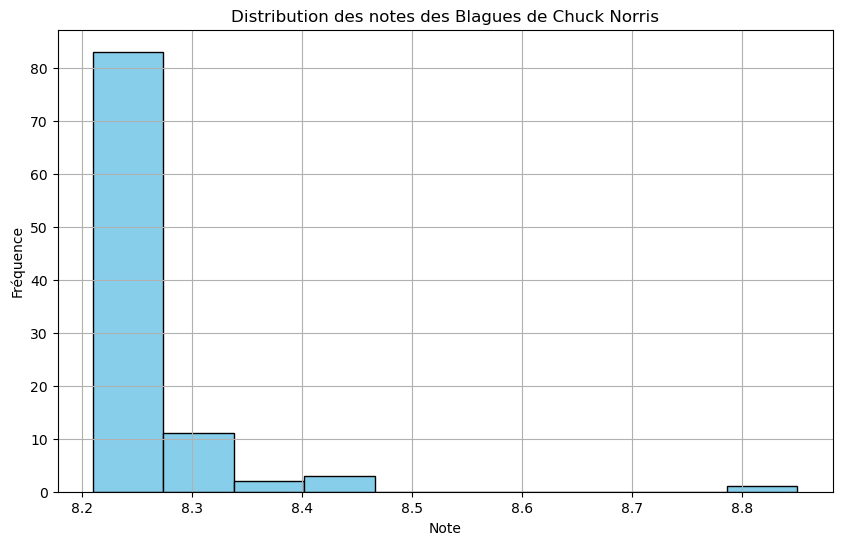

In [25]:
import matplotlib.pyplot as plt

# Visualisation de la distribution des notes
plt.figure(figsize=(10, 6))
plt.hist(df2['note'], bins=10, edgecolor='black', color='skyblue')
plt.title('Distribution des notes des Blagues de Chuck Norris')
plt.xlabel('Note')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()